In [51]:
import easyvvuq as uq
import chaospy as cp
import matplotlib.pyplot as plt
import os

In [52]:
params = {
    "n": {"type": "float", "default": 2950.0}, 
    "hmp": {"type": "float", "default": 3.0, "min": 0.0, "max":10},
    "h1": {"type": "float", "default": 90.0}, 
    "pbm": {"type": "float", "default": 3.05},
    "P": {"type": "float", "default": 390.0},
    "outfile": {"type": "string", "default": "output.json"}
}

In [53]:
workdir=os.path.abspath('D:/0_PhD/0_hallgato/1_jelfel/EasyVVUQ')
workdir

'D:\\0_PhD\\0_hallgato\\1_jelfel\\EasyVVUQ'

In [54]:
'python '+workdir+'\OA.py'

'python D:\\0_PhD\\0_hallgato\\1_jelfel\\EasyVVUQ\\OA.py'

In [63]:
encoder = uq.encoders.GenericEncoder(template_fname='input.template', delimiter='$', target_filename='input.json')
decoder = uq.decoders.JSONDecoder(target_filename='output.json', output_columns=['Ph', 'eta'])
#actions = uq.actions.local_execute(encoder, 'python OA.py', decoder)
execute = uq.actions.ExecuteLocal('python '+workdir+'\OA.py')

actions = uq.actions.Actions(uq.actions.CreateRunDirectory('/tmp'), 
                  uq.actions.Encode(encoder), execute, uq.actions.Decode(decoder))

In [64]:
campaign = uq.campaign.Campaign(name='OA', params=params, actions=actions, work_dir=workdir)
print(campaign)

db_location = sqlite:///D:\0_PhD\0_hallgato\1_jelfel\EasyVVUQ\OAg09a158e/campaign.db
active_sampler_id = None
campaign_name = OA
campaign_dir = D:\0_PhD\0_hallgato\1_jelfel\EasyVVUQ\OAg09a158e
campaign_id = 1



In [65]:
vary = {
    "n": cp.Normal(2950.0, 10),
    #"hmp": cp.Normal(3.0, 0.1),
    "h1": cp.Normal(90.0, 5),
    "pbm": cp.Normal(3.05, 0.5),
    "P": cp.Normal(390.0, 20),
}

In [66]:
#campaign.set_sampler(uq.sampling.SCSampler(vary=vary, polynomial_order=3))
#campaign.draw_samples(num_samples=10)

In [67]:
campaign.set_sampler(uq.sampling.PCESampler(vary=vary, polynomial_order=3))

In [68]:
campaign.execute().collate(progress_bar=True)

100%|██████████| 256/256 [00:01<00:00, 128.51it/s]


In [69]:
campaign.get_collation_result()

,run_id,iteration,n,h1,pbm,P,hmp,outfile,Ph,eta
,0,0,0,0,0,0,0,0,0,0
0,1,0,2926.655858,78.327929,1.882793,343.311716,3.0,output.json,280.420813,0.102101
1,2,0,2926.655858,78.327929,1.882793,375.160724,3.0,output.json,280.420813,0.093434
2,3,0,2926.655858,78.327929,1.882793,404.839276,3.0,output.json,280.420813,0.086584
3,4,0,2926.655858,78.327929,1.882793,436.688284,3.0,output.json,280.420813,0.080269
4,5,0,2926.655858,78.327929,2.679018,343.311716,3.0,output.json,385.268872,0.140277
...,...,...,...,...,...,...,...,...,...,...
251,252,0,2973.344142,101.672071,3.420982,436.688284,3.0,output.json,487.072903,0.139422
252,253,0,2973.344142,101.672071,4.217207,343.311716,3.0,output.json,591.920962,0.215519
253,254,0,2973.344142,101.672071,4.217207,375.160724,3.0,output.json,591.920962,0.197222


In [70]:
results = campaign.analyse(qoi_cols=['Ph'])

C:\Users\sandor\anaconda3\envs\vvuq\lib\site-packages\easyvvuq\analysis\results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


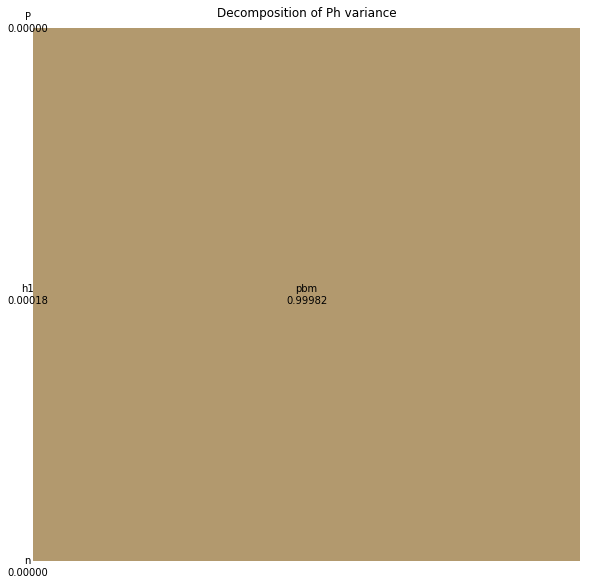

In [71]:
results.plot_sobols_treemap('Ph', figsize=(10, 10))
plt.axis('off');